In [1]:
import pandas as pd
import matplotlib.pyplot as plt
pd.set_option('float_format', '{:.2f}'.format)
import warnings as w
w.filterwarnings('ignore')

In [2]:
sales_df = pd.read_excel(r'C:\Users\USER\Documents\Data to Analyze\Supermaket_Sales.xlsx', sheet_name='Supermaket_Sales')

In [3]:
sales_df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.14,548.97,2019-05-01 00:00:00,13:08:00,Ewallet,522.83,4.76,26.14,9.10
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.82,80.22,2019-08-03 00:00:00,10:29:00,Cash,76.40,4.76,3.82,9.60
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.22,340.53,2019-03-03 00:00:00,13:23:00,Credit C,324.31,4.76,16.22,7.40
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.29,489.05,2019-01-27 00:00:00,20:33:00,Ewallet,465.76,4.76,23.29,8.40
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.21,634.38,2019-08-02 00:00:00,10:37:00,Ewallet,604.17,4.76,30.21,5.30


In [4]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426 entries, 0 to 425
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               426 non-null    object 
 1   Branch                   426 non-null    object 
 2   City                     426 non-null    object 
 3   Customer type            426 non-null    object 
 4   Gender                   426 non-null    object 
 5   Product line             426 non-null    object 
 6   Unit price               416 non-null    float64
 7   Quantity                 426 non-null    int64  
 8   Tax 5%                   426 non-null    float64
 9   Total                    424 non-null    float64
 10  Date                     426 non-null    object 
 11  Time                     426 non-null    object 
 12  Payment                  426 non-null    object 
 13  cogs                     426 non-null    float64
 14  gross margin percentage  4

#### Customer type Column

In [5]:
# Checking for inconsistency and inaccuracy
sales_df['Customer type'].unique()

array(['Member', 'Normal', 'Meber'], dtype=object)

In [6]:
# replacing 'Meber' with 'Member'
sales_df['Customer type']=sales_df['Customer type'].replace({'Meber':'Member'})

#### Gender Column

In [7]:
# Checking for inconsistency and inaccuracy
sales_df['Gender'].unique()

array(['Female', 'Male', 'M', 'Men'], dtype=object)

In [8]:
# replacing 'M' and 'Men' with 'Male'
sales_df['Gender']=sales_df['Gender'].replace({'M':'Male', 'Men':'Male'})

#### Product line Column

In [9]:
sales_df['Product line'].unique()

array(['Health and beauty', 'Electronic accessories',
       'Home and lifestyle', 'Sports and travel', 'Food and beverages',
       'Fashion accessories', 'Electronic accsories', 'Fashion accesses',
       'Food and beveras'], dtype=object)

In [10]:
sales_df['Product line']=sales_df['Product line'].replace({'Electronic accsories':'Electronic accessories', 'Fashion accesses':'Fashion accessories', 'Food and beveras':'Food and beverages'})

#### Unit price Column

In [11]:
for i in sales_df[sales_df['Unit price'].isna()].index:
    sales_df.loc[i,'Unit price'] = (sales_df.loc[i,'Total'] - sales_df.loc[i,'Tax 5%']) / sales_df.loc[i,'Quantity'] 

#### Total Column

In [12]:
sales_df['Total'] = (sales_df['Unit price'] * sales_df['Quantity']) + sales_df['Tax 5%']

#### Date Column

In [13]:
sales_df['Date']= pd.to_datetime(sales_df['Date'])

#### Payment Column

In [14]:
sales_df['Payment'].unique()

array(['Ewallet', 'Cash', 'Credit C', 'Credit c', 'Credit card'],
      dtype=object)

In [15]:
sales_df['Payment']=sales_df['Payment'].replace({'Credit C':'Credit card', 'Credit c':'Credit card'})

#### Rating Column

In [16]:
sales_df['Rating']=sales_df['Rating'].fillna(0)

## Question on the data to be Analyze

#### 1. Which Branch is the most profitable?
#### 2. Which Customer type has the highest patronage?
#### 3a. Which is the most patronized product?
#### 3b. Which product line makes the most sales?
#### 4. Which part of the year has the highest sales?
#### 5a. Which payment method is often used?
#### 5b. Which of the payment methods brought in the highest sales?

### 1. Which Branch is the most profitable?

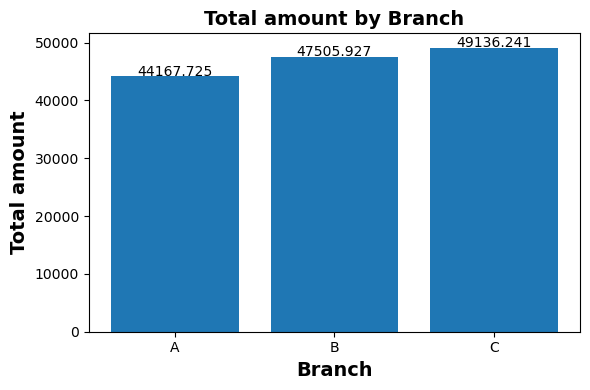

In [17]:
plt.figure(figsize=(6,4))
sales_df1=sales_df.groupby('Branch')['Total'].sum().reset_index()

plt.bar(sales_df1['Branch'], sales_df1['Total'])
plt.ylabel('Total amount', fontweight='bold', fontsize=14)
plt.title('Total amount by Branch', fontweight='bold', fontsize=14)
plt.xlabel('Branch', fontweight='bold', fontsize=14)
plt.xticks(rotation=0)

for i, total in enumerate(sales_df1['Total']):
    plt.text(i, total+100, str(total), ha='center')

plt.tight_layout()
plt.show()

### 2. Which Customer type has the highest patronage?

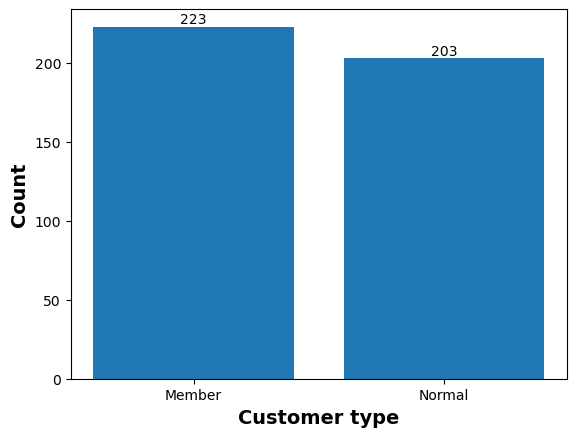

In [18]:
sales_df2=sales_df.groupby('Customer type')['Invoice ID'].count().reset_index()

plt.bar(sales_df2['Customer type'], sales_df2['Invoice ID'])

plt.xlabel('Customer type', fontweight='bold', fontsize=14)
plt.ylabel('Count', fontweight='bold', fontsize=14)

for i, number in enumerate(sales_df2['Invoice ID']):
    plt.text(i, number+2, str(number), ha='center')
    
plt.show()

### 3a. Which is the most patronized product?

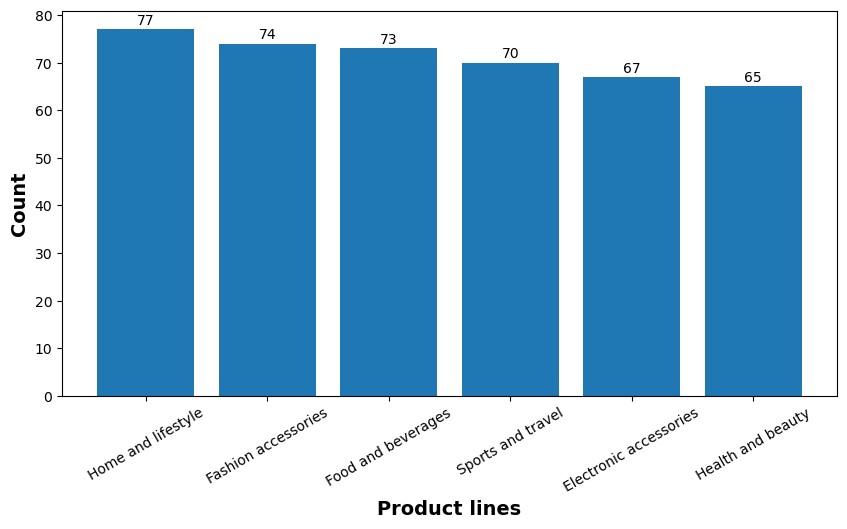

In [19]:
plt.figure(figsize=(10,5))
sales_df3a=sales_df.groupby('Product line')['Invoice ID'].count().reset_index().sort_values(by='Invoice ID', ascending=False)

plt.bar(sales_df3a['Product line'], sales_df3a['Invoice ID'])
plt.xlabel('Product lines', fontweight='bold', fontsize=14)
plt.ylabel('Count', fontweight='bold', fontsize=14)
plt.xticks(rotation=30)

for i, number in enumerate(sales_df3a['Invoice ID']):
    plt.text(i, number+1, str(number), ha='center')

plt.show()

### 3b. Which product line makes the most sales?

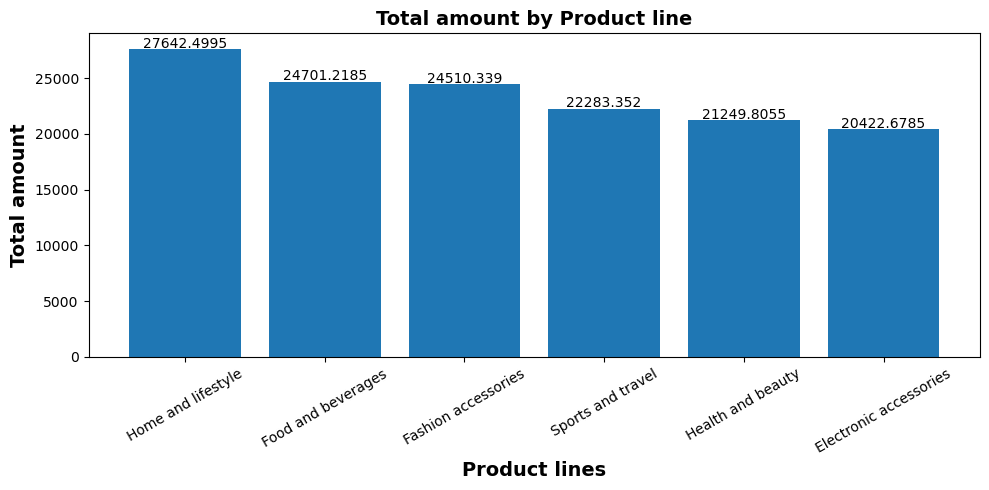

In [20]:
plt.figure(figsize=(10,5))
sales_df3b=sales_df.groupby('Product line')['Total'].sum().reset_index().sort_values(by='Total', ascending=False)

plt.bar(sales_df3b['Product line'], sales_df3b['Total'])
plt.xlabel('Product lines', fontweight='bold', fontsize=14)
plt.ylabel('Total amount', fontweight='bold', fontsize=14)
plt.title('Total amount by Product line', fontweight='bold', fontsize=14)
plt.xticks(rotation=30)

for i, total in enumerate(sales_df3b['Total']):
    plt.text(i, total+100, str(total), ha='center')

plt.tight_layout()
plt.show()

### 4. Which part of the year has the highest sales?

In [21]:
sales_df['Month'] = sales_df['Date'].dt.strftime('%B')

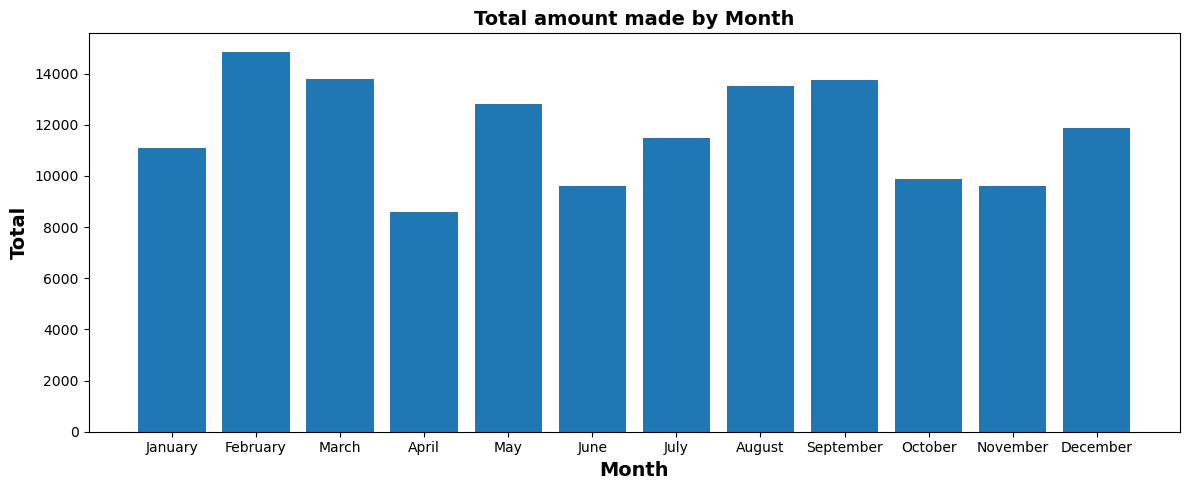

In [22]:
months= ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
sales_df['Month']= pd.Categorical(sales_df['Month'], categories=months, ordered=True)

sales_df4=sales_df.groupby('Month')['Total'].sum().reset_index()
plt.figure(figsize=(12,5))
plt.bar(sales_df4['Month'], sales_df4['Total'])
plt.xlabel('Month', fontweight='bold', fontsize=14)
plt.ylabel('Total', fontweight='bold', fontsize=14)
plt.title('Total amount made by Month', fontweight='bold', fontsize=14)

plt.tight_layout()

plt.show()

### 5a. Which payment method is often used?

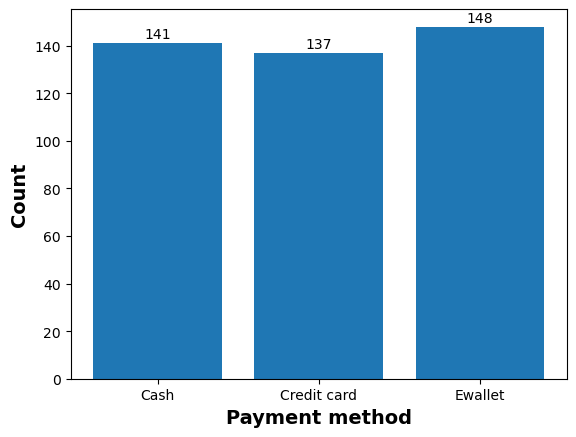

In [23]:
sales_df5a=sales_df.groupby('Payment')['Invoice ID'].count().reset_index()

plt.bar(sales_df5a['Payment'], sales_df5a['Invoice ID'])
plt.xlabel('Payment method', fontweight='bold', fontsize=14)
plt.ylabel('Count', fontweight='bold', fontsize=14)

for i, cases in enumerate(sales_df5a['Invoice ID']):
    plt.text(i, cases+2, str(cases), ha='center')

plt.show()

### 5b. Which of the payment methods brought in the highest sales?

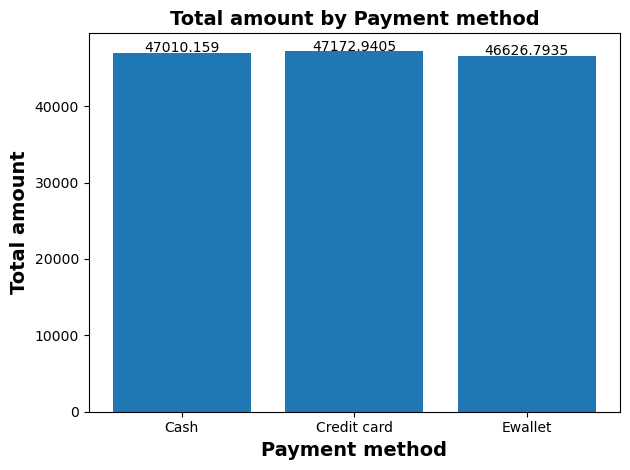

In [24]:
sales_df5b=sales_df.groupby('Payment')['Total'].sum().reset_index()

plt.bar(sales_df5b['Payment'], sales_df5b['Total'])

plt.xlabel('Payment method', fontweight='bold', fontsize=14)
plt.ylabel('Total amount', fontweight='bold', fontsize=14)
plt.title('Total amount by Payment method', fontweight='bold', fontsize=14)

for i, total in enumerate(sales_df5b['Total']):
    plt.text(i, total+100, str(total), ha='center')

plt.tight_layout()
plt.show()